In [1]:
import pandas as pd
# import sklearn libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
# import ploting libraries
from matplotlib import pyplot as plt
# import io libraries for tree image
import io
import pydotplus
import imageio

In [2]:
# data reading from file
dataset = pd.read_csv(r"./balloons_dataset.csv")

In [3]:
dataset.head(5)

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,ADULT,T
3,YELLOW,SMALL,STRETCH,ADULT,T
4,YELLOW,SMALL,STRETCH,ADULT,T


In [4]:
# assign the tranning columns x
features = dataset.columns
features = features.drop('inflated')
features = list(features)
features

['color', 'size', 'act', 'age']

In [5]:
# preprocession datasets
le = preprocessing.LabelEncoder()

for feature in features:
    le.fit(dataset[feature])
    dataset[feature] = le.transform(dataset[feature]) 

In [6]:
# split the dataset for traning and testing
train, test = train_test_split(dataset,test_size = 0.10)
print("Total Training data: "+ str(len(train)))
print("Total Test data: "+ str(len(test)))

Total Training data: 90
Total Test data: 10


In [7]:
#assian datasets for traning
x_train = train[features]
y_train = train["inflated"]
#assian datasets for testing
x_test = test[features]
y_test = test["inflated"]

In [8]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names = features, class_names=['T', 'F'])
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.imshow(img)

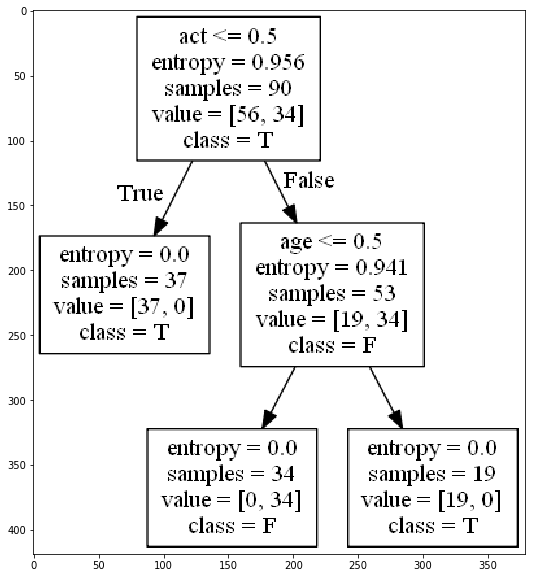

In [10]:
show_tree(clf, features, 'tree.png')

In [11]:
# predict the target class
y_pred = clf.predict(x_test)
dataset_pred = x_test
dataset_pred['inflated'] = (y_pred)
print(dataset_pred)

    color  size  act  age inflated
32      1     0    1    0        T
44      1     0    0    0        F
0       1     1    1    0        T
80      0     0    1    0        T
29      1     0    1    0        T
73      0     1    0    1        F
47      1     0    0    1        F
36      1     0    1    1        F
57      0     1    1    0        T
75      0     0    1    0        T


In [12]:
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using desicion Tree: ", round(score, 1), "%" )

Accuracy using desicion Tree:  100.0 %
